# PRCP-1009-CellphonePrice

#### Problem Statement

Mobile price depends on various factors such as resolution, brand, size, weight, imaging quality, RAM, battery and cpu power. The aim of this project is to develop a model to predict the price of a mobile when the specifications of a mobile are given and to find the ML algorithm that predicts the price most accurately

Task 1:-Prepare a complete data analysis report on the given data.<br>

Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.<br>

Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.<br>





In [1]:
# Loading Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Task 1:-Prepare a complete data analysis report on the given data.

In [2]:
# Loading dataset
data=pd.read_csv('mobile.csv')
pd.set_option('display.max_columns',None)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

The data features are as follows:<br>

* battery_power:Battery Power in mAh<br>

* blue:Has BlueTooth or not<br>

* clock_speed:Microprocessor clock speed<br>

* dual_sim:The phone has dual sim support or not<br>

* fc:Front Camera Megapixels<br>

* four_g:Has 4G support or not<br>

* int_memory:Internal Memory in GigaBytes<br>

* m_dep:Mobile Depth in Cm<br>

* mobile_wtWeight of Mobile Phone<br>

* n_cores:Number of cores in the processor<br>

* pc:Primary Camera Megapixels<br>

* px_height:Pixel Resolution height<br>

* px_width:Pixel resolution width<br>

* ram:RAM in MB<br>

* sc_h:Mobile screen height in cm<br>

* sc_w:Mobile screen width in cm<br>

* talk_time:Longest time after a single charge<br>

* three_g:3g or not<br>

* touch_screen:Has touch screen or not<br>

* wifi:Has wifi or not<br>

# Basic Checks

In [5]:
data.shape

(2000, 21)

In [6]:
data.info()  #Memory Status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
# Statistical Analysis
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Minimum value of px_height and sc_w cannot be zero so we need to handle that

In [8]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [9]:
bin_cols=['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi','price_range']

In [10]:
# Unique Values
for i in bin_cols:
    print(i)
    print(data[i].unique())
    print('****************************')

blue
[0 1]
****************************
dual_sim
[0 1]
****************************
four_g
[0 1]
****************************
n_cores
[2 3 5 6 1 8 4 7]
****************************
three_g
[0 1]
****************************
touch_screen
[0 1]
****************************
wifi
[1 0]
****************************
price_range
[1 2 3 0]
****************************


In [11]:
data.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

**UNIVARIATE ANALYSIS**

HISTOGRAM-TO CHECK THE DISTRIBUTION OF DATA

In [12]:
num_cols=['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

In [13]:
for x in num_cols:
    print(f'Skewness of {x} is',data[x].skew())

Skewness of battery_power is 0.03189847179278164
Skewness of clock_speed is 0.1780841202790887
Skewness of fc is 1.0198114105315519
Skewness of int_memory is 0.05788932785206039
Skewness of m_dep is 0.08908200979245855
Skewness of mobile_wt is 0.006558157428692449
Skewness of pc is 0.017306150471392553
Skewness of px_height is 0.6662712560691598
Skewness of px_width is 0.014787473768006081
Skewness of ram is 0.006628035398750348
Skewness of sc_h is -0.09888424098283438
Skewness of sc_w is 0.6337870734456067
Skewness of talk_time is 0.009511762221541457


In [14]:
for x in num_cols:
    print(f'Kurtosis of {x} is',data[x].kurtosis())

Kurtosis of battery_power is -1.2241438831965528
Kurtosis of clock_speed is -1.3234172221019123
Kurtosis of fc is 0.2770763245651877
Kurtosis of int_memory is -1.2160740301516093
Kurtosis of m_dep is -1.2743488835633268
Kurtosis of mobile_wt is -1.2103764737553446
Kurtosis of pc is -1.1714987948421944
Kurtosis of px_height is -0.3158654936040146
Kurtosis of px_width is -1.186005229243282
Kurtosis of ram is -1.1919130700631546
Kurtosis of sc_h is -1.1907912468413369
Kurtosis of sc_w is -0.3895227893524629
Kurtosis of talk_time is -1.2185909629106917


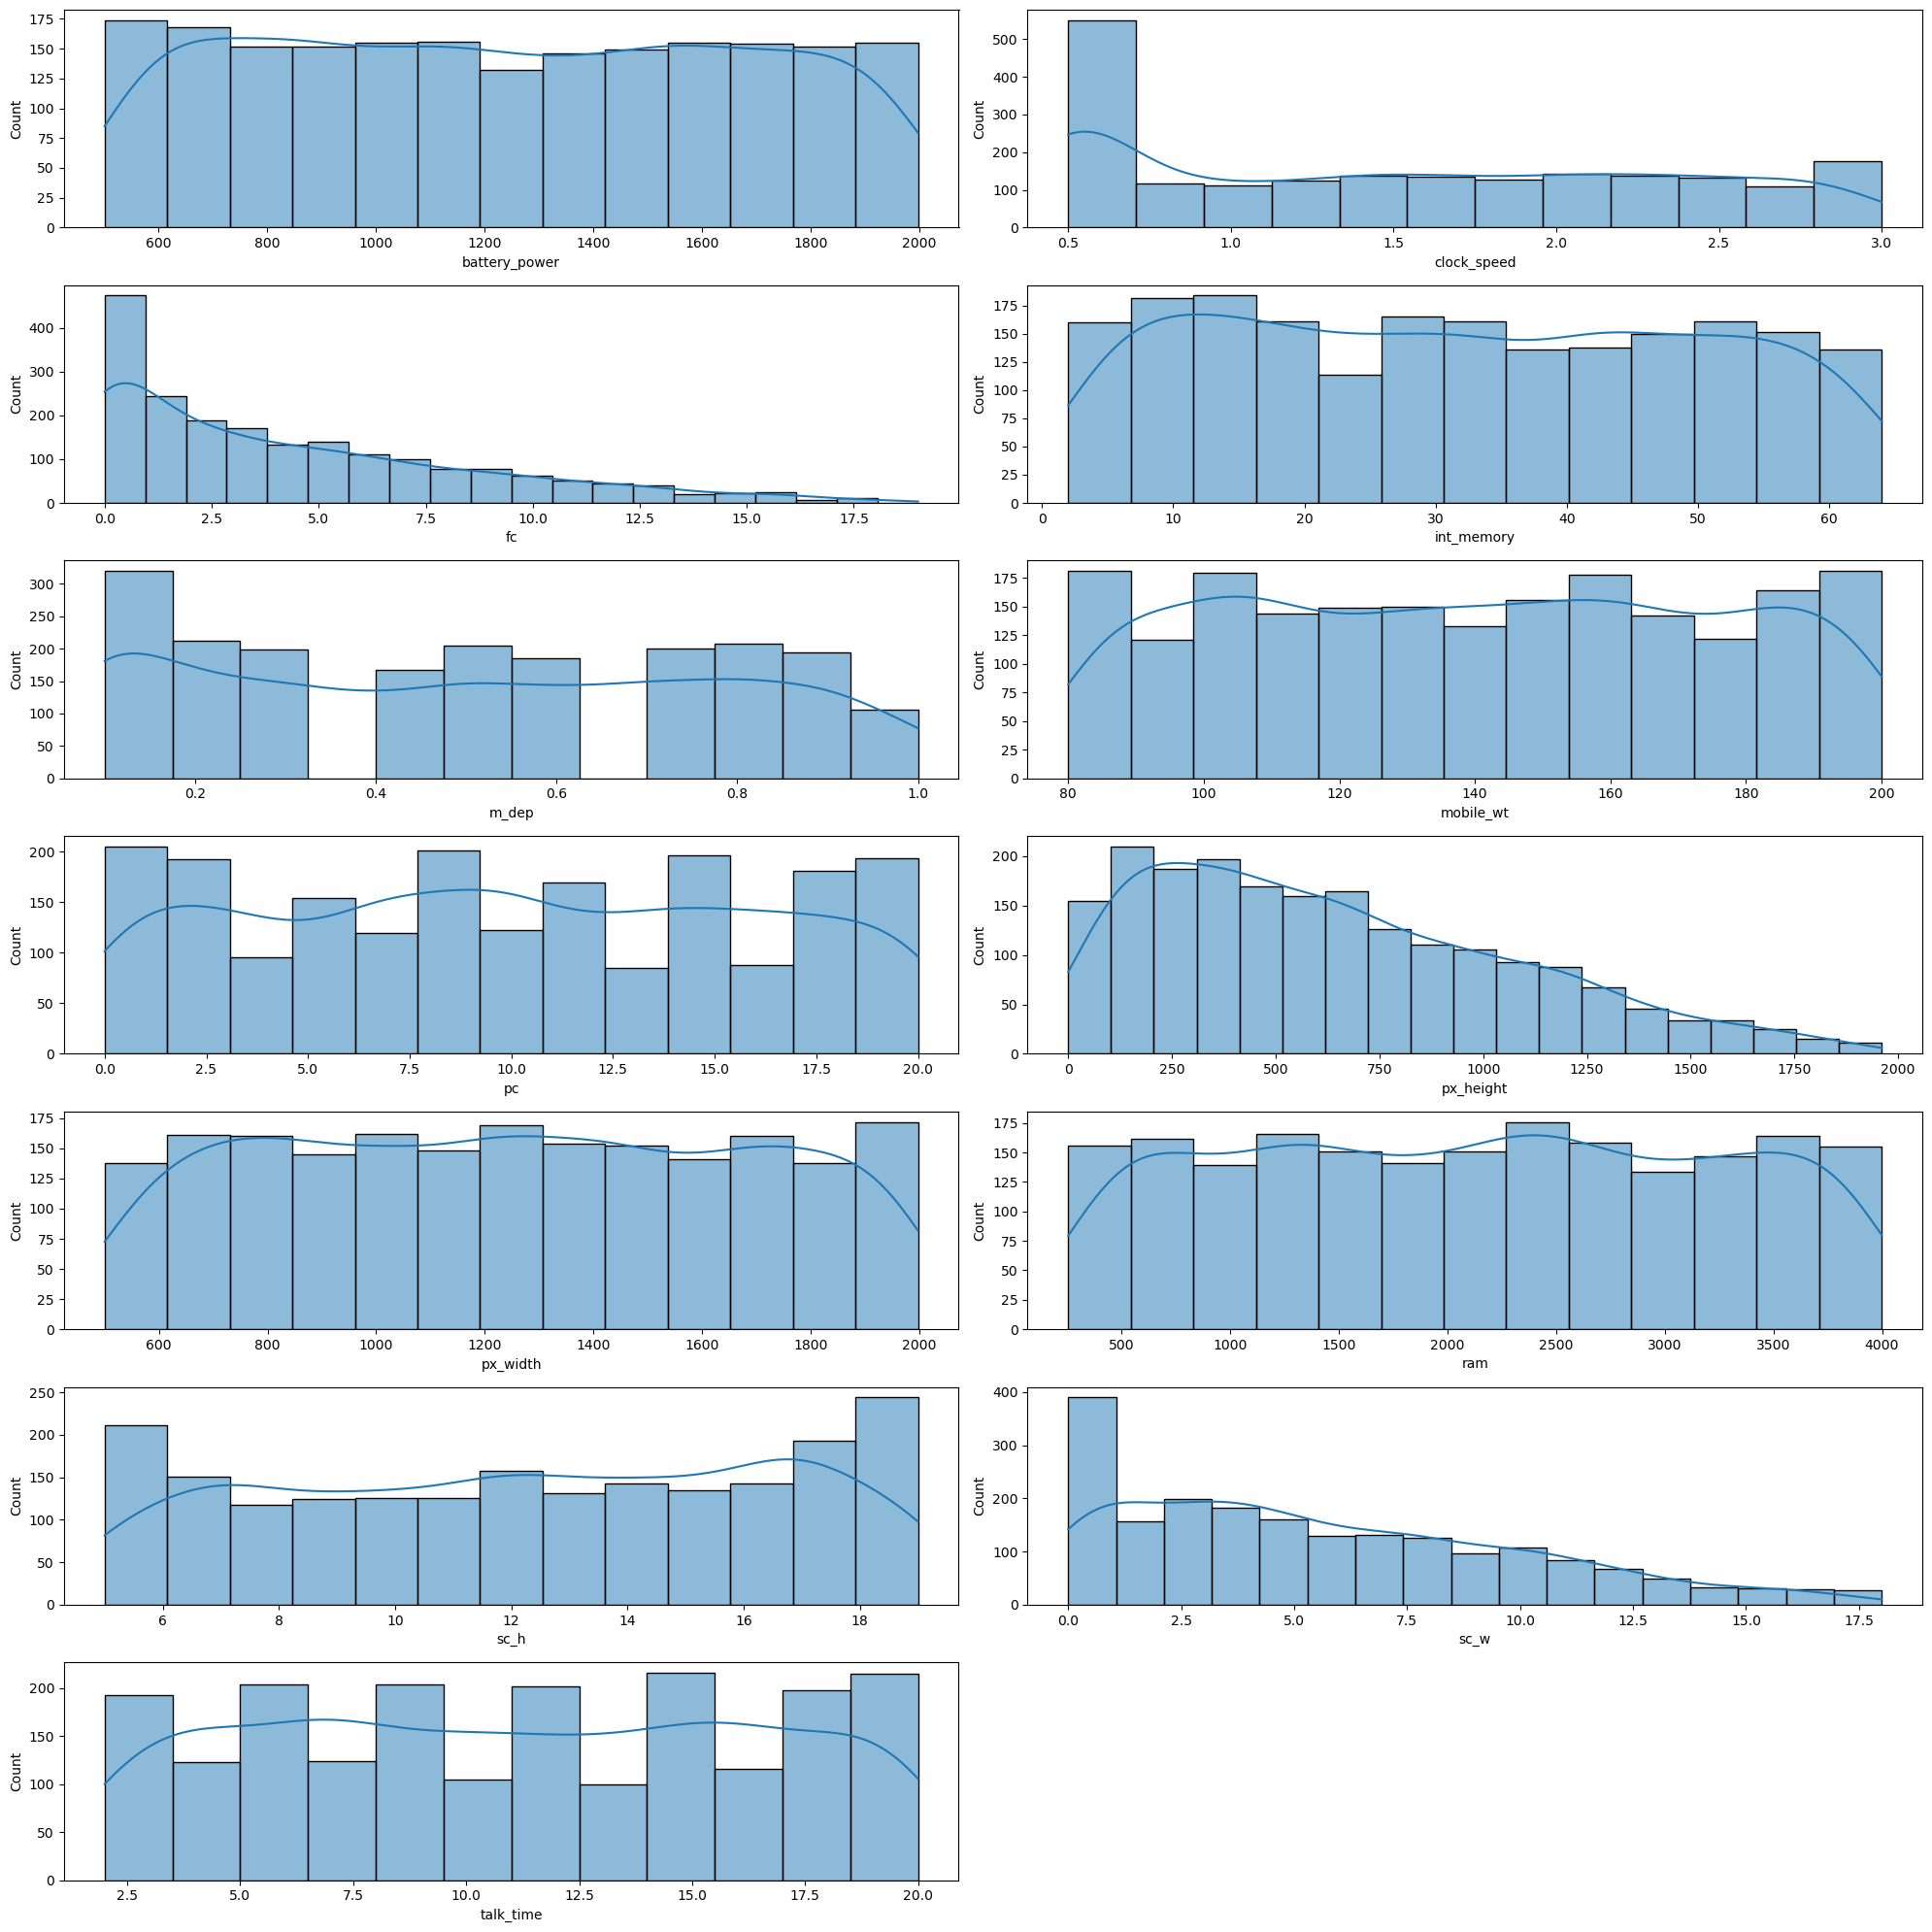

In [15]:
plt.figure(figsize=(20,20))
plot_num=1
for i in num_cols:
    if plot_num<=13:
        ax=plt.subplot(7,2,plot_num)
        sns.histplot(x=data[i],kde=True)
    plot_num+=1
plt.tight_layout()
    
    

* The distribution of all continuous columns are not normal
* fc,px_height,sc_w columns are right skewed

COUNT PLOT

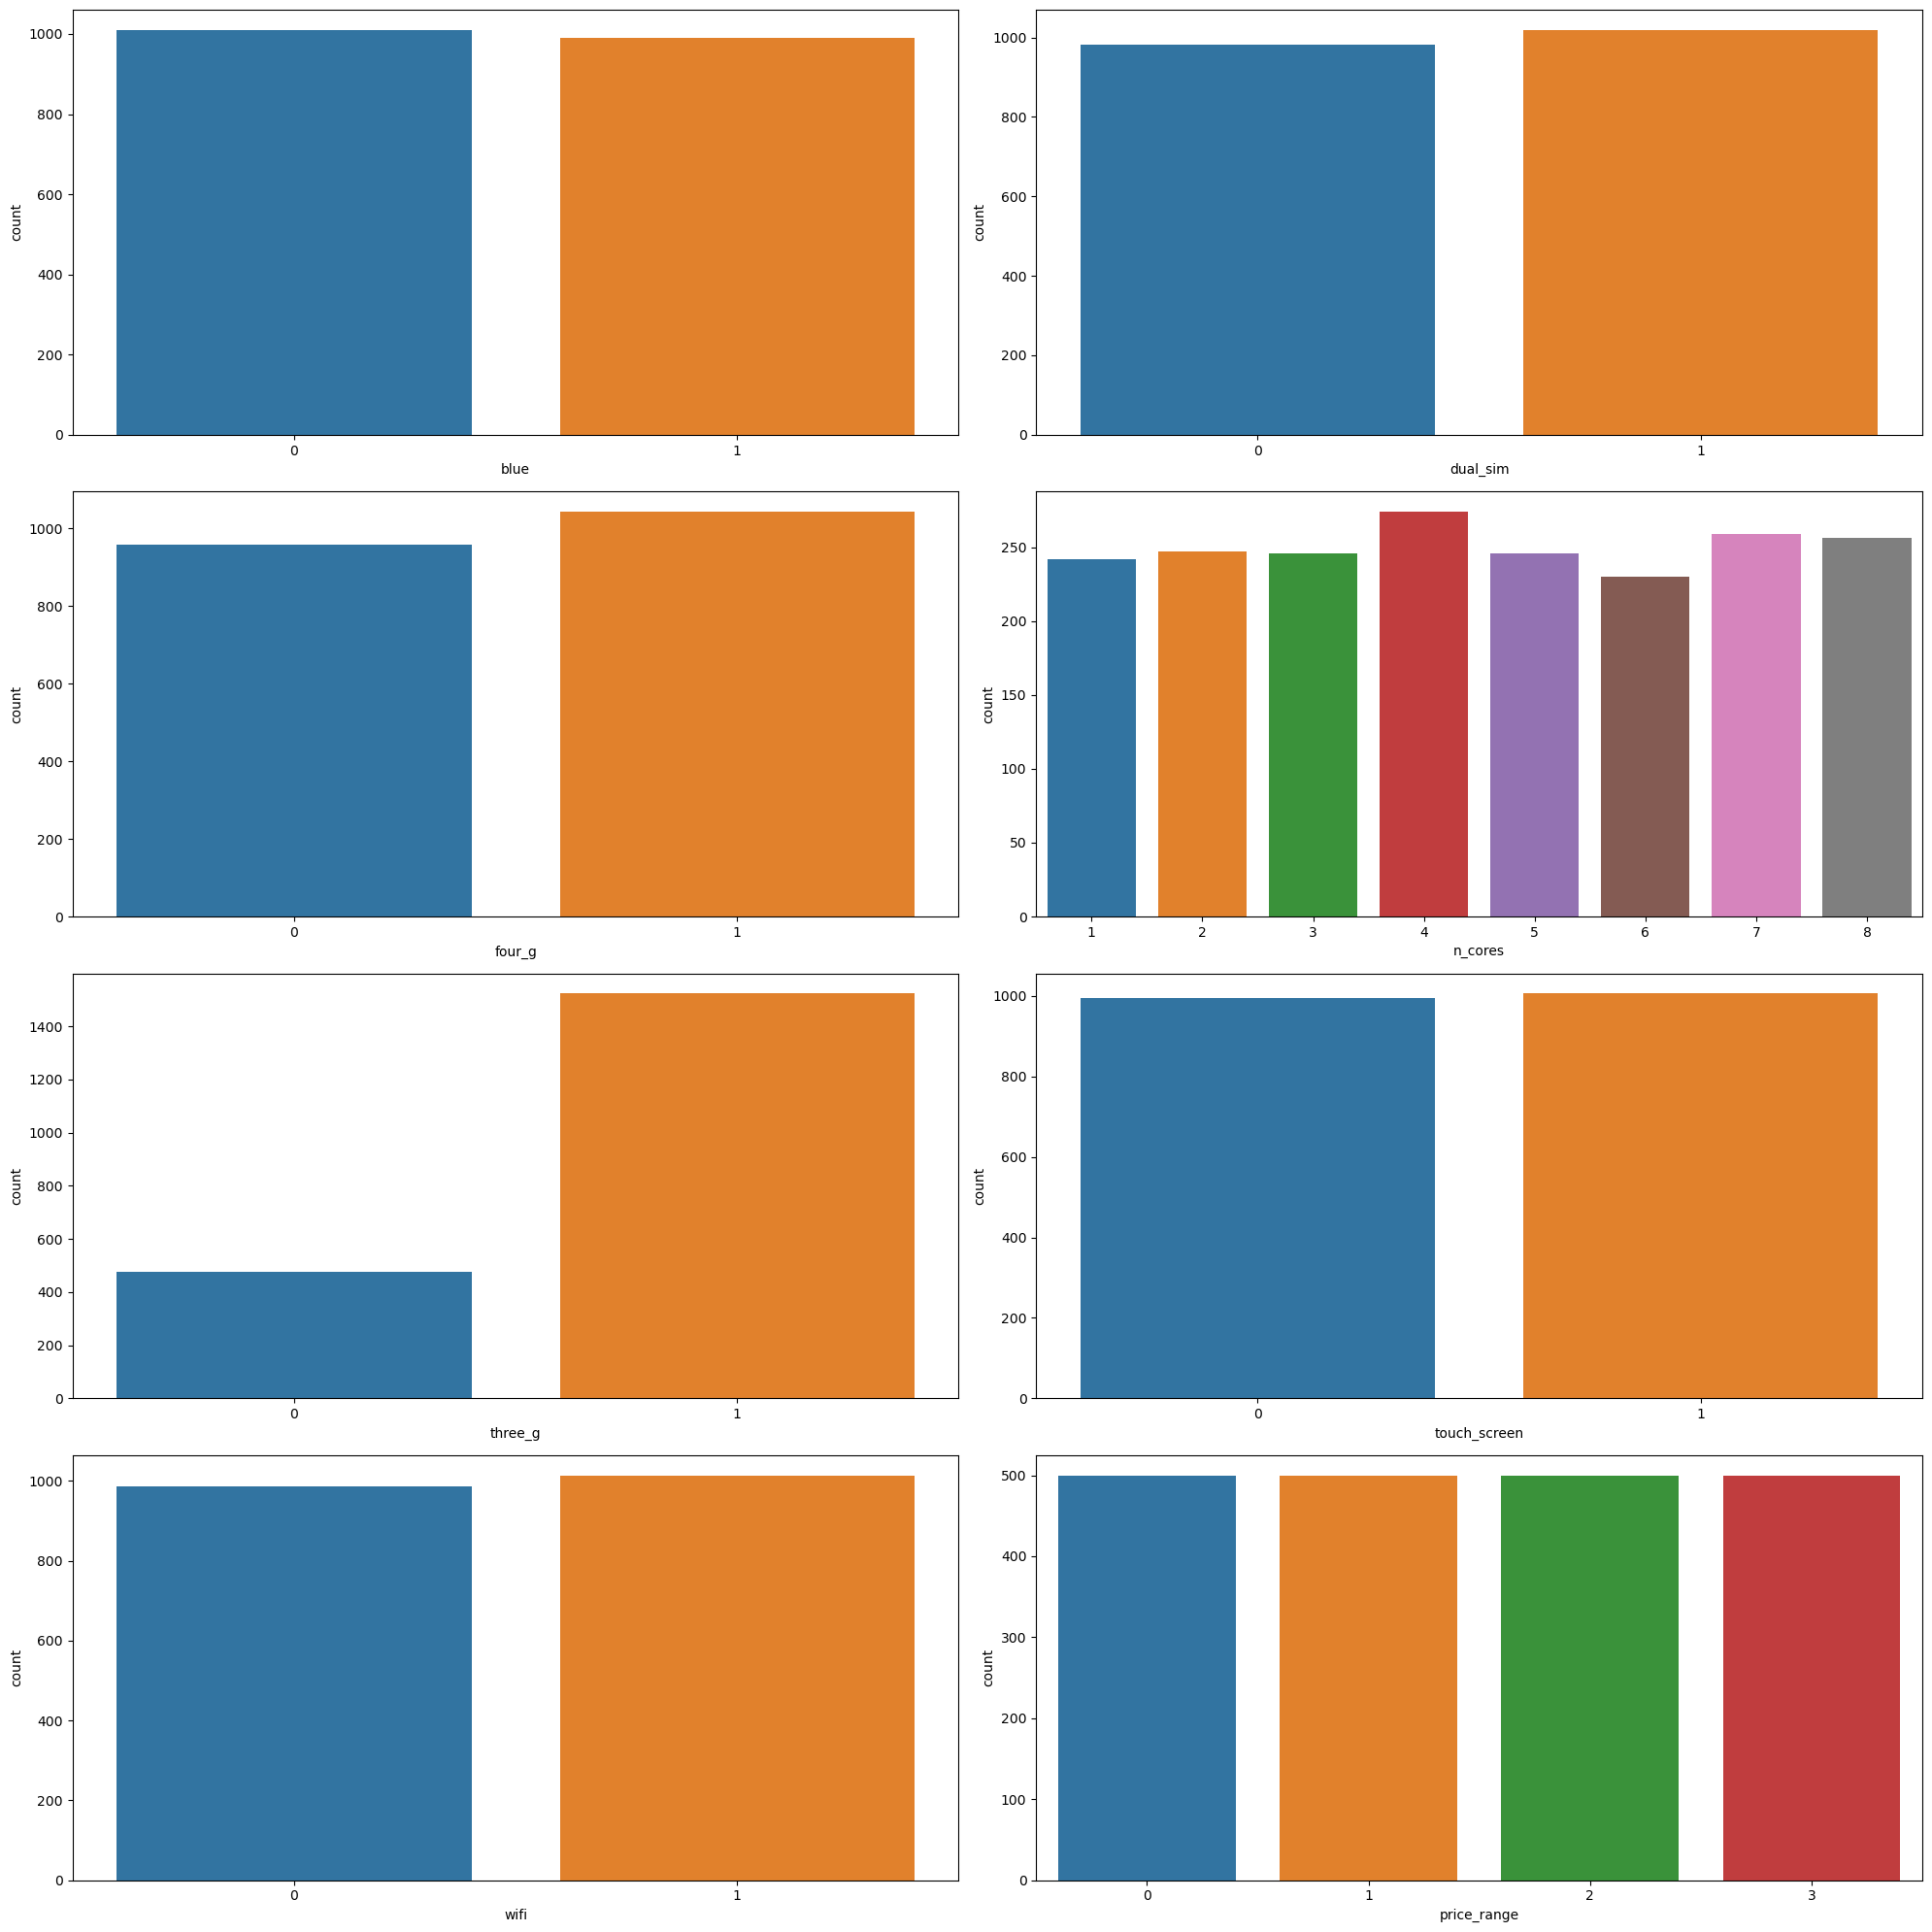

In [16]:
plt.figure(figsize=(20,20))
plot_num=1
for i in bin_cols:
    if plot_num<=8:
        ax=plt.subplot(4,2,plot_num)
        sns.countplot(x=data[i])
    plot_num+=1
plt.tight_layout()
    

There are 4 price ranges :Data is balanced

In [17]:
data['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

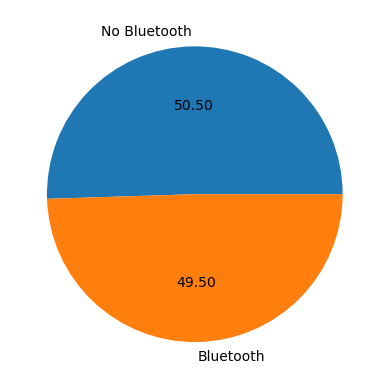

In [18]:
plt.pie(data['blue'].value_counts(),labels=['No Bluetooth','Bluetooth'],autopct='%.2f')
plt.show()

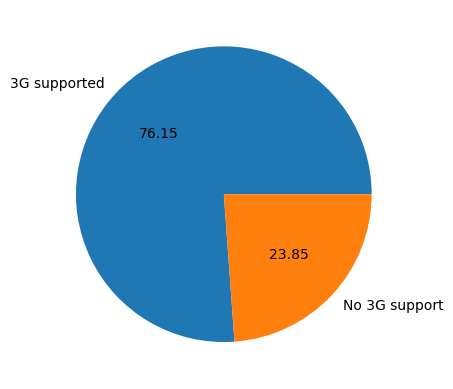

In [19]:
plt.pie(data['three_g'].value_counts(),labels=['3G supported','No 3G support'],autopct='%.2f')
plt.show()

76% of the phones has 3G support

BIVARIATE ANALYSIS

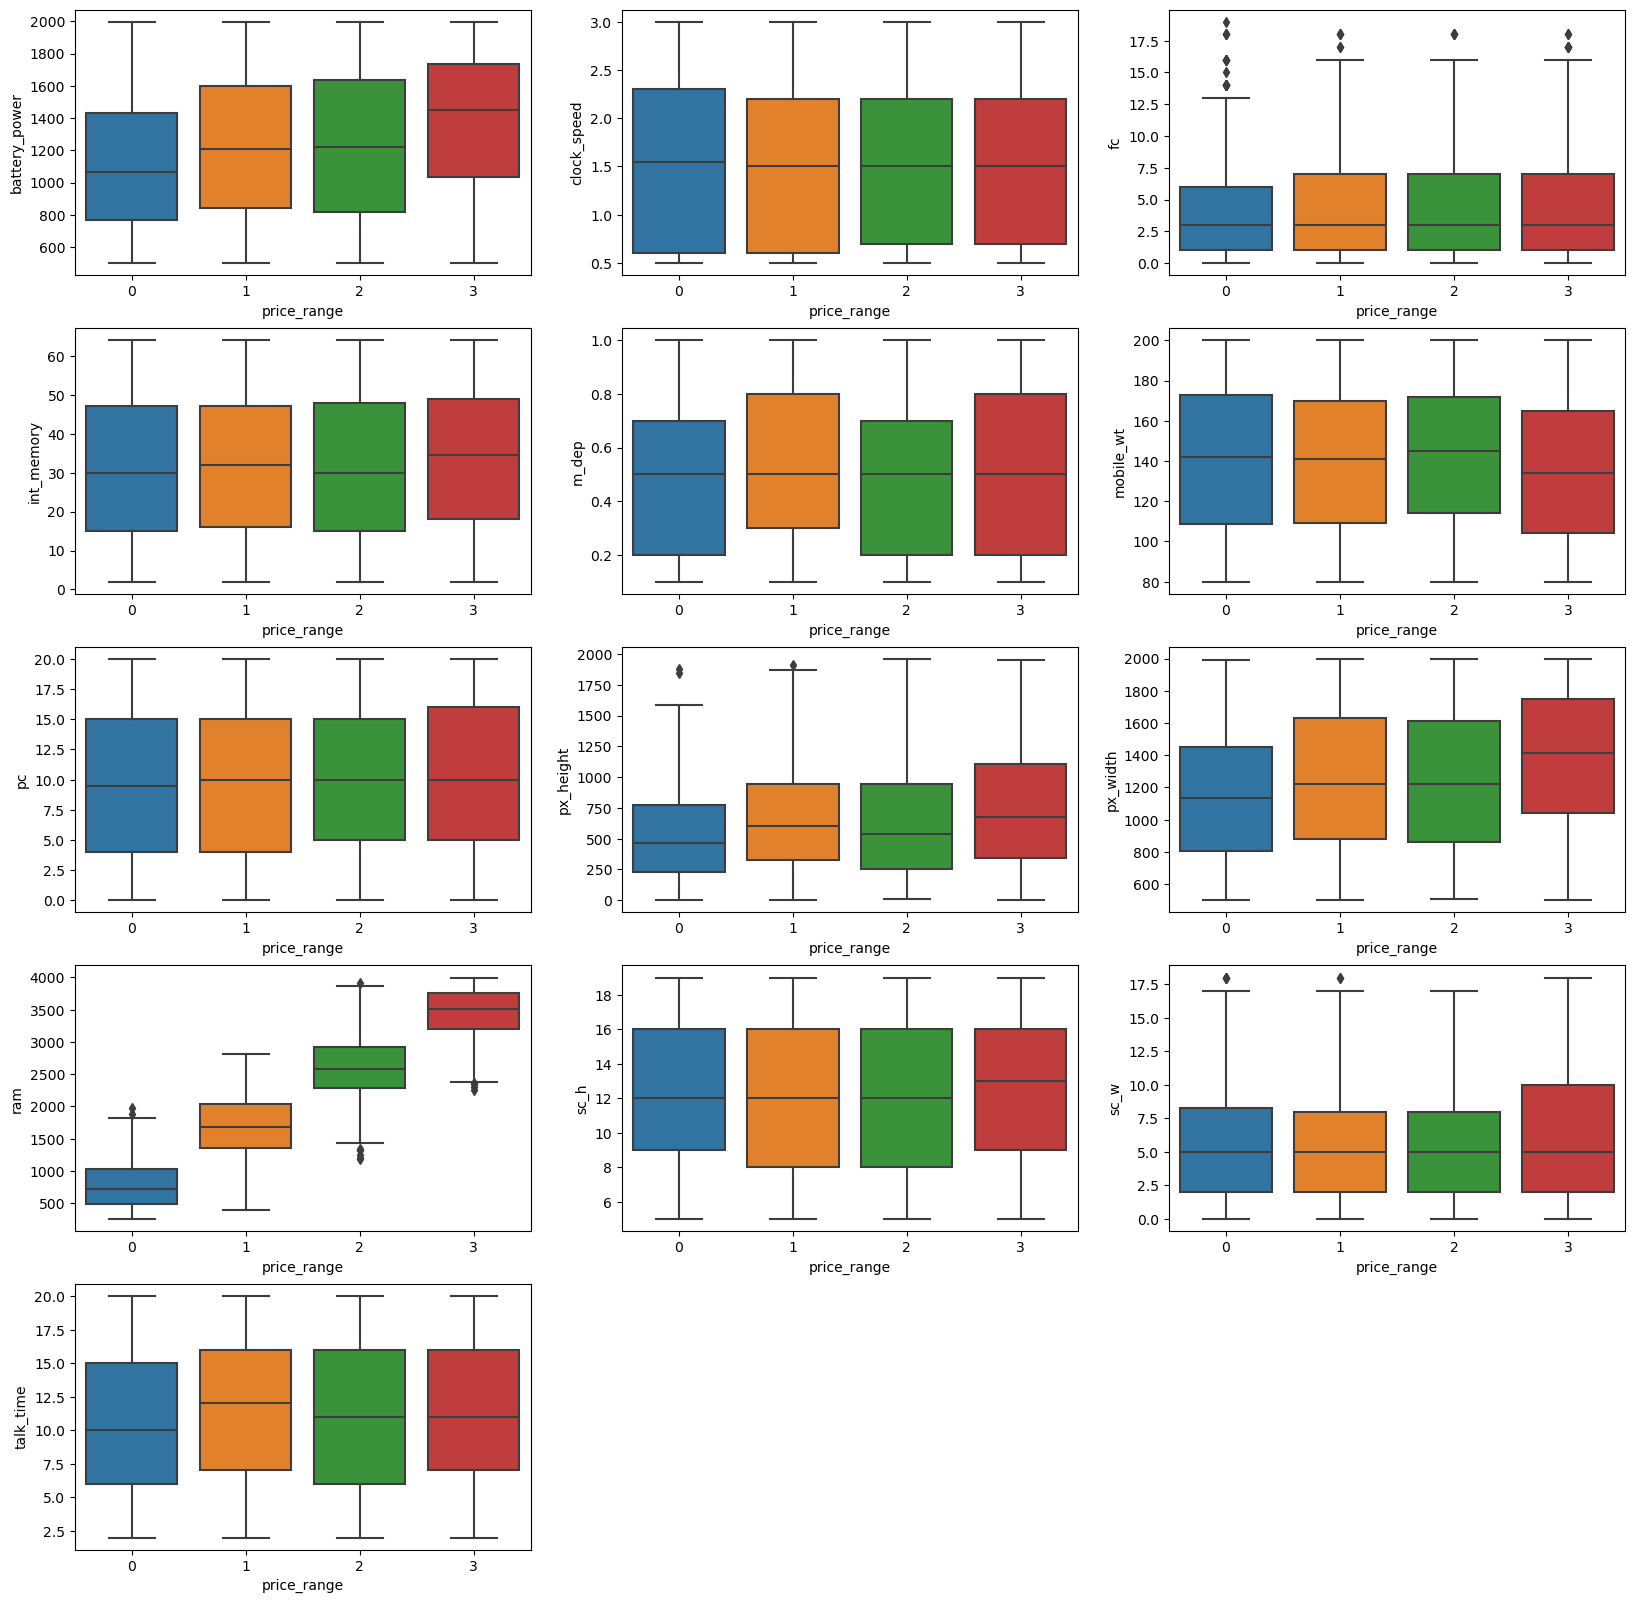

In [20]:
plt.figure(figsize=(20,20))
plot_num=1
for i in num_cols:
    if plot_num<=14:
        plt.subplot(5,3,plot_num)
        sns.boxplot(x=data['price_range'], y=data[i])
    plot_num+=1


* Battery power increases with price range
* clock speed shows no variation with price range
* fc is constant for all price ranges
* costly phones are lighter
* px_hight:There is little variation in pixel height
* px_weight:Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. 
* ram increases continuously with price range
* pc,sc_w,sc_h talk time has no correlation with price range

In [21]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

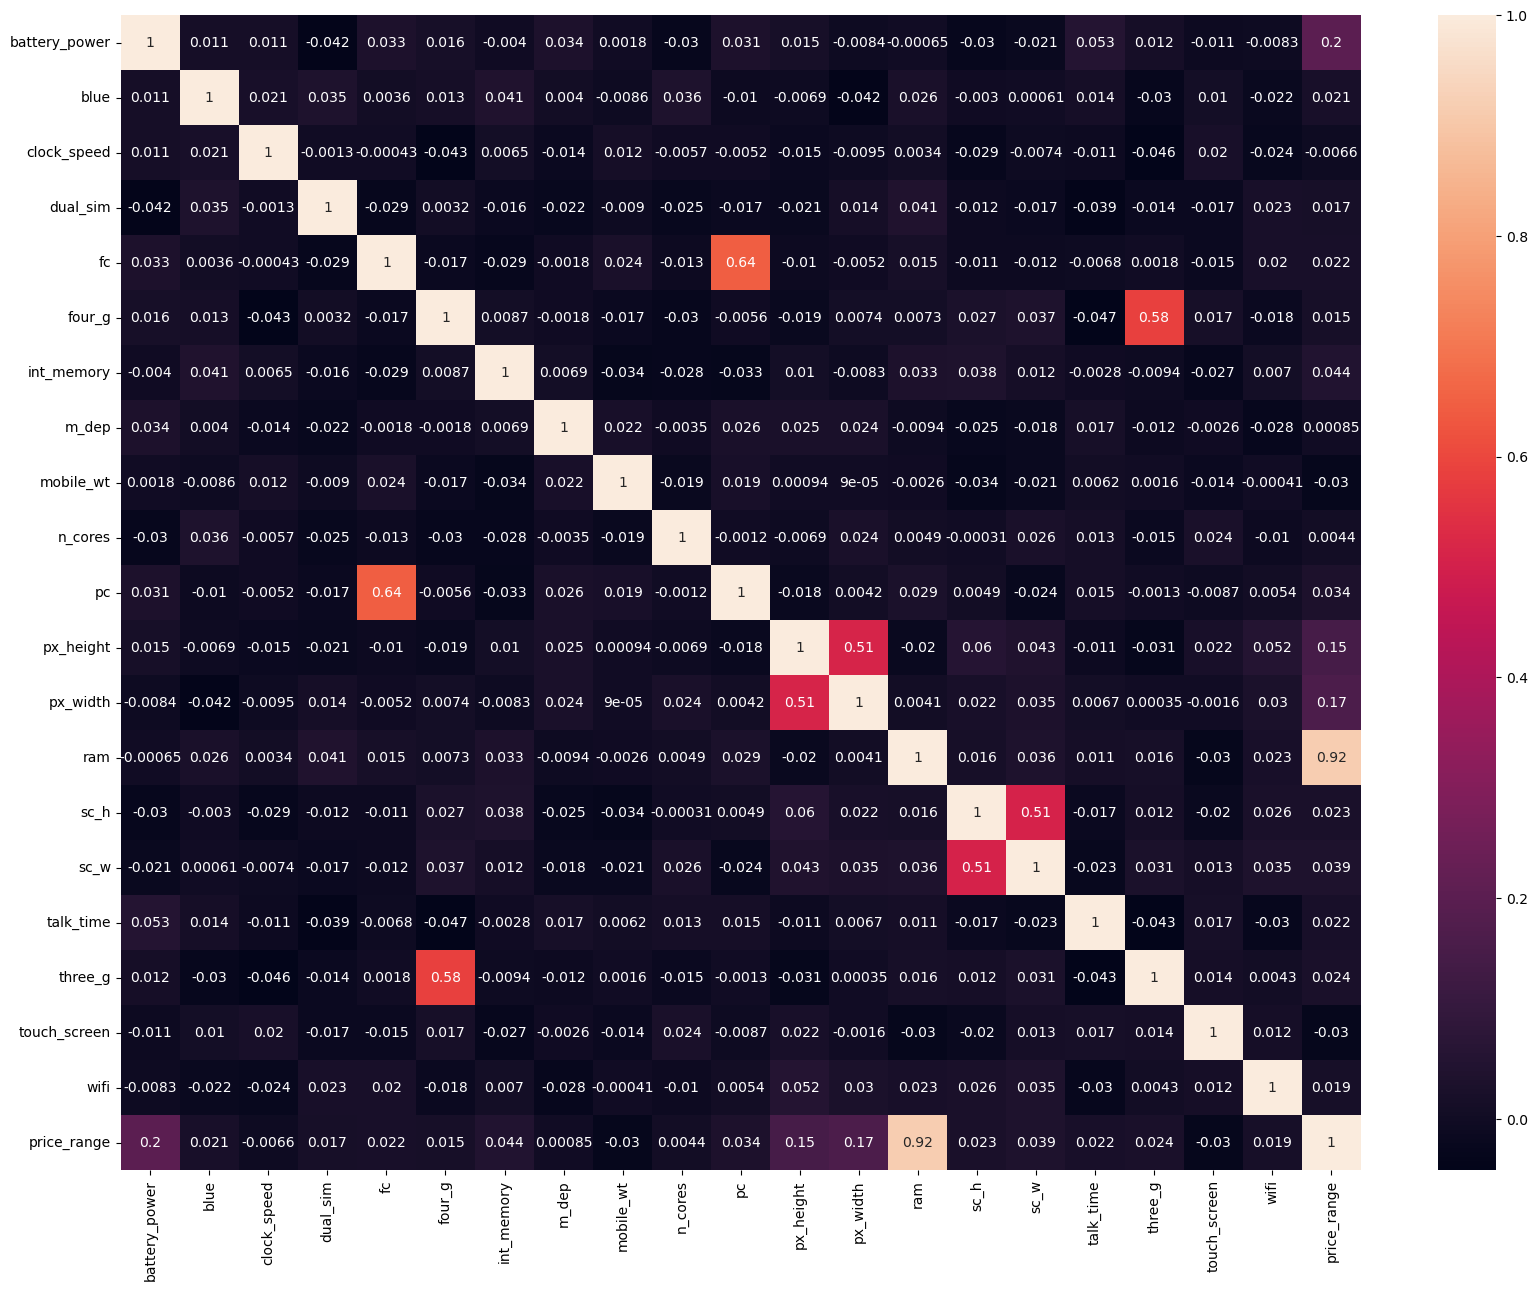

In [22]:
plt.figure(figsize = [20, 15])
sns.heatmap(data.corr(),annot=True)

* px_width and px_height,pc and fc is showing multicollinearity
* ram has high correlation with the target


# CHECKING FOR OUTLIERS

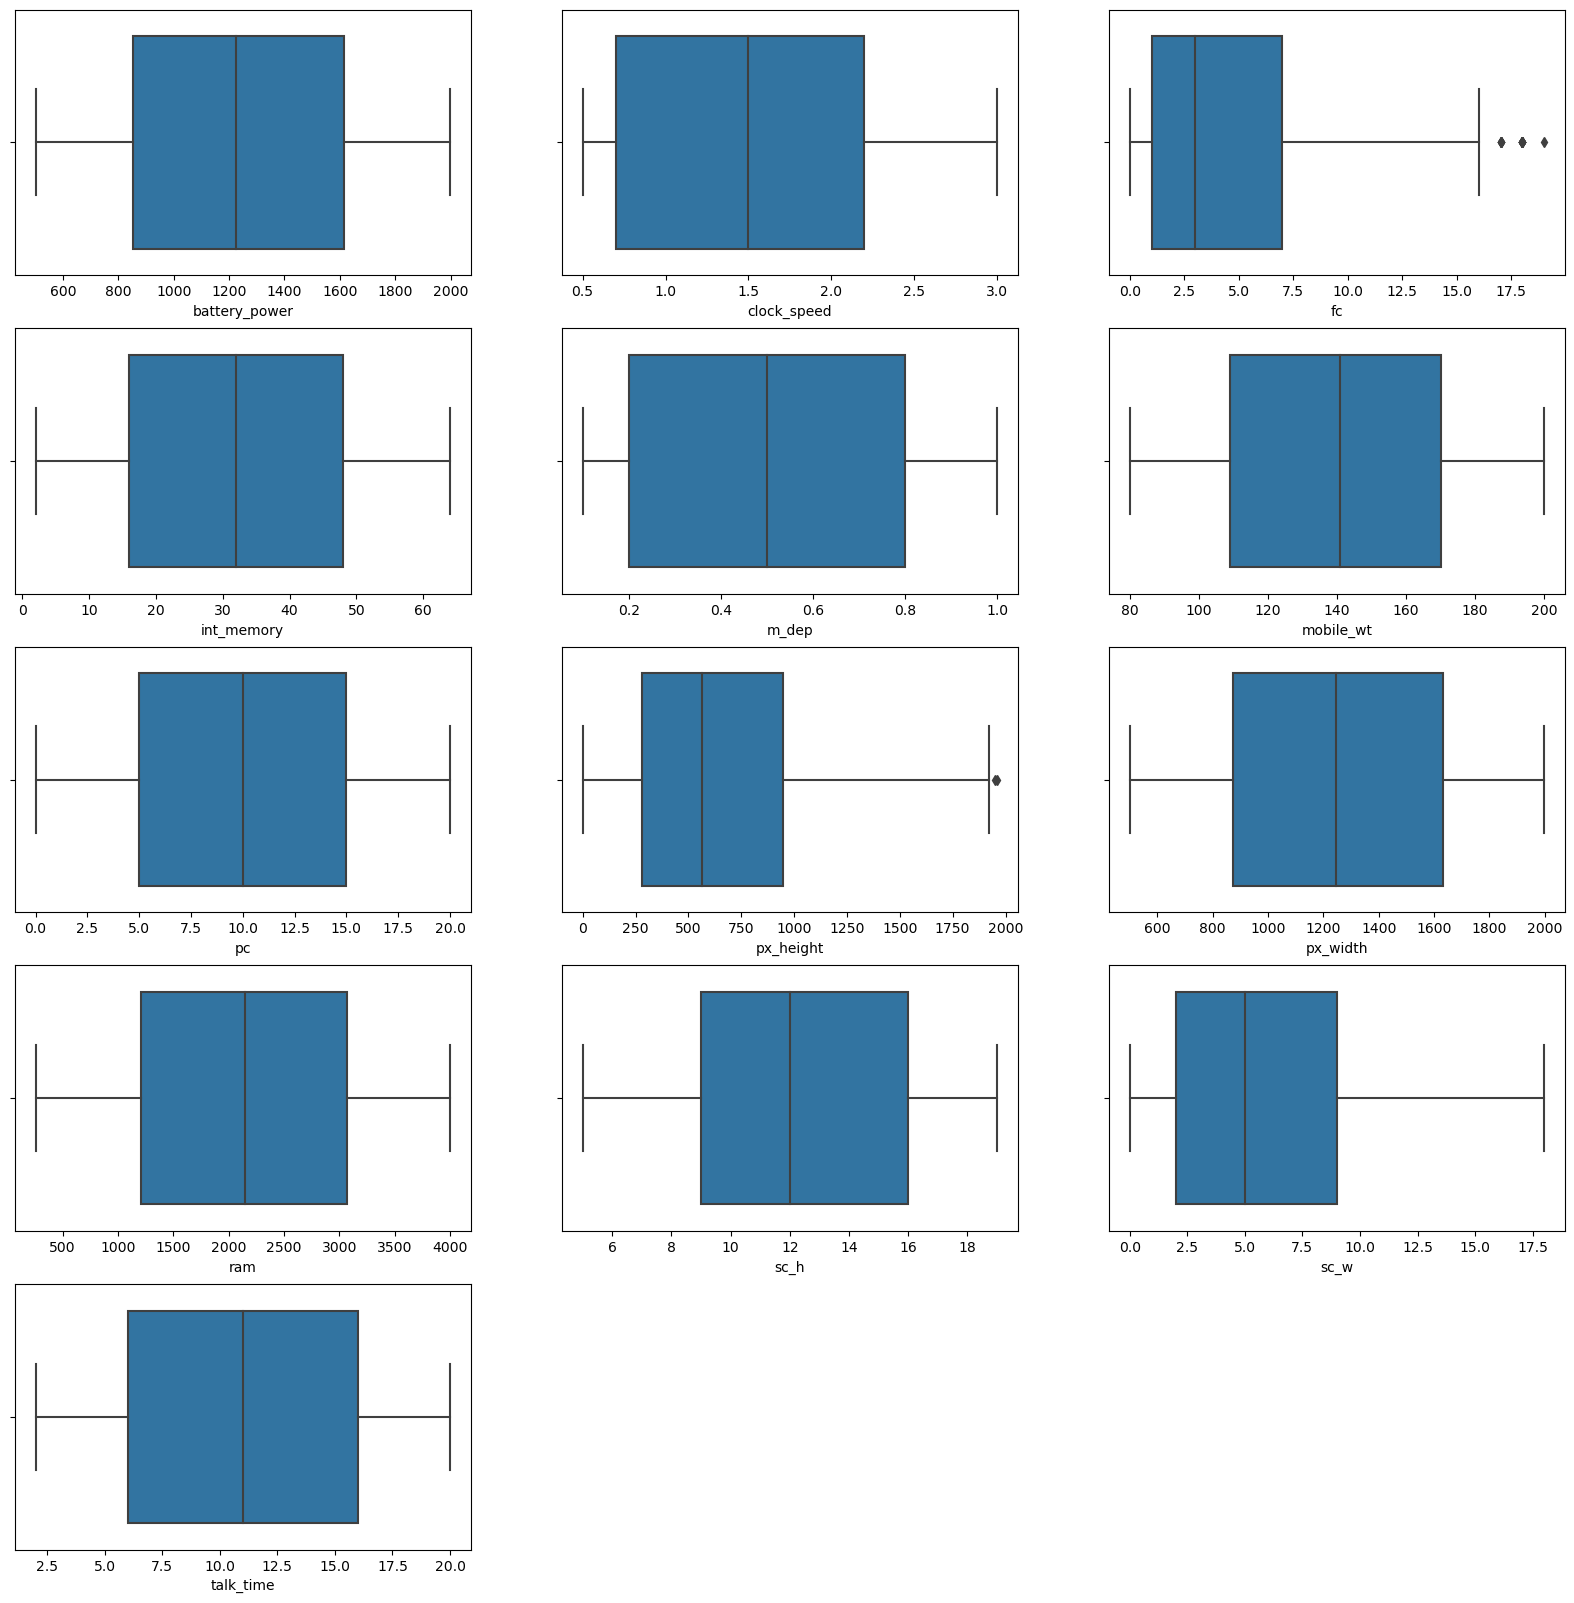

In [23]:
plt.figure(figsize=(20,20))
plot_num=1
for i in num_cols:
    if plot_num<=14:
        plt.subplot(5,3,plot_num)
        sns.boxplot(x=data[i])
    plot_num+=1

# DATA CLEANING AND PREPROCESSING

In [24]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Data is clean with no null values

In [25]:
data.duplicated().sum()  ## No duplicate entries

0

# Handling corrupted data

In [26]:
# No of zero values in px_height
print('Zero values in px_height is',data[data['px_height']==0].shape[0])

# No of zero values column 'Screen Width'
print('Zero values in sc_w column is',data[data['sc_w']==0].shape[0])

Zero values in px_height is 2
Zero values in sc_w column is 180


The distribution of px_height and sc_w column is not normal so replacing zero values with the median

In [27]:
data.loc[data['px_height']==0,'px_height']=data['px_height'].median()
data.loc[data['sc_w']==0,'sc_w']=data['sc_w'].median()

# OUTLIERS

#### px_height

<Axes: xlabel='px_height'>

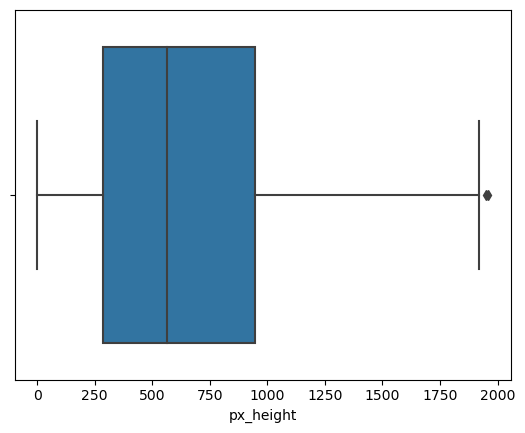

In [28]:
sns.boxplot(x=data['px_height'])

In [29]:
Q1=data['px_height'].quantile(0.25)
Q3=data['px_height'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
print("IQR  ",IQR)
print("Lower  ",lower)
print("Upper  ",upper)
print("Outliers Percentage",len(data.loc[(data['px_height']<lower)|(data['px_height']>upper)])/len(data))
    

IQR   663.25
Lower   -710.875
Upper   1942.125
Outliers Percentage 0.001


In [30]:
data.loc[(data['px_height']<lower)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [31]:
data.loc[(data['px_height']>upper)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,6,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,2,1960,1963,1622,18,17,16,1,1,1,2


#### fc

<Axes: xlabel='fc'>

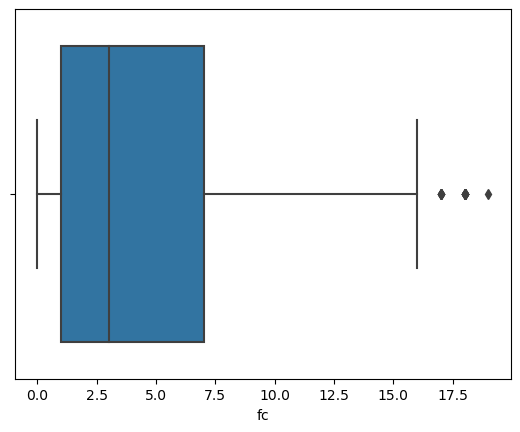

In [32]:
sns.boxplot(x=data['fc'])

In [33]:
Q1=data['fc'].quantile(0.25)
Q3=data['fc'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
print("IQR  ",IQR)
print("Lower  ",lower)
print("Upper  ",upper)
print("Outliers Percentage",len(data.loc[(data['fc']<lower)|(data['fc']>upper)])/len(data))
    

IQR   6.0
Lower   -8.0
Upper   16.0
Outliers Percentage 0.009


In [34]:
data.loc[(data['fc']<lower)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [35]:
data.loc[(data['fc']>upper)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,19,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,20,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,19,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,18,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,19,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,20,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,19,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,20,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,20,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,20,142,1039,1220,9,3,20,0,1,0,1


# px_height and fc column is having outliers

<Axes: xlabel='fc', ylabel='Count'>

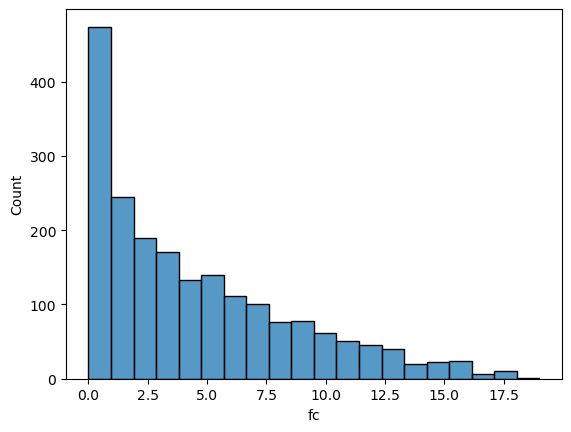

In [36]:
sns.histplot(x=data['fc'])

we won't treat any value as outlier here because somewhat these values seems to be realistically to have in different kinds of mobiles available in the market.

# SCALING


In [37]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()


In [38]:
data[['battery_power','clock_speed','int_memory', 'm_dep', 'mobile_wt','px_height','px_width', 'ram','sc_h', 'sc_w', 'talk_time']]=scale.fit_transform(data[['battery_power','clock_speed','int_memory', 'm_dep', 'mobile_wt','px_height','px_width', 'ram','sc_h', 'sc_w', 'talk_time']])

In [39]:
data.head(4)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,0.68,0,1,0,0.080645,0.555556,0.900000,2,2,0.009699,0.170895,0.612774,0.285714,0.352941,0.944444,0,0,1,1
1,0.347361,1,0.00,1,0,1,0.822581,0.666667,0.466667,3,6,0.461460,0.993324,0.634687,0.857143,0.117647,0.277778,1,1,0,2
2,0.041416,1,0.00,1,2,1,0.629032,0.888889,0.541667,5,6,0.644206,0.811749,0.627205,0.428571,0.058824,0.388889,1,1,0,2
3,0.076152,1,0.80,0,0,0,0.129032,0.777778,0.425000,6,9,0.620214,0.858478,0.671566,0.785714,0.411765,0.500000,1,0,0,2


#### Defining x and y

In [40]:
x = data.drop(['price_range'],axis = 1)
y = data['price_range']
     

In [41]:
x=x.astype(int)

# FEATURE SELECTION

Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.<br>

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(x,y)

In [43]:
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(x.columns)
     

In [44]:
scores_fea = pd.concat([columns,scores],axis=1)
scores_fea.columns = ['Specifications','Score']

In [45]:
scores_fea.sort_values(by='Score',ascending=False)

,Specifications,Score
4,fc,10.135166
10,pc,9.186054
9,n_cores,9.097556
6,int_memory,6.032258
16,talk_time,5.843137
7,m_dep,5.245283
15,sc_w,4.000000
13,ram,3.000000
11,px_height,3.000000
0,battery_power,3.000000


#### SELECTING  12 FEATURES HAVIN HIGH SCORES

In [46]:

print(scores_fea.nlargest(12,'Score'))

   Specifications      Score
4              fc  10.135166
10             pc   9.186054
9         n_cores   9.097556
6      int_memory   6.032258
16      talk_time   5.843137
7           m_dep   5.245283
15           sc_w   4.000000
0   battery_power   3.000000
11      px_height   3.000000
13            ram   3.000000
12       px_width   3.000000
18   touch_screen   1.928429


#### REDEFINING X AND Y

In [47]:
x=data[['ram','battery_power','px_width','fc','pc','n_cores','px_height','touch_screen','int_memory','sc_w','talk_time','m_dep']]
y=data['price_range']

In [48]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.<br>

# LOGISTIC REGRESSION

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

In [50]:
y_pred_test = lr.predict(x_test)
y_pred_train=lr.predict(x_train)

In [51]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report

In [52]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_pred_train))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred_test))

Train set Accuracy: 
0.908125
_____________________________________

Test set Accuracy:
0.9075


In [53]:
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       103
           1       0.93      0.84      0.89       101
           2       0.78      0.89      0.83        81
           3       0.95      0.92      0.93       115

    accuracy                           0.91       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.91      0.91      0.91       400



# HYPERPARAMETER TUNING

In [54]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg'], 
    'penalty': ['l1', 'l2'] 
}

In [55]:
from sklearn.model_selection import GridSearchCV
gd_lr = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', verbose=1)
gd_lr.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']},
             scoring='accuracy', verbose=1)

In [56]:
best_params = gd_lr.best_params_
#best_model = grid_search.best_estimator_
best_params

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [57]:
lr=LogisticRegression(multi_class='multinomial',C= 100, penalty= 'l2', solver= 'newton-cg')
lr.fit(x_train,y_train)

LogisticRegression(C=100, multi_class='multinomial', solver='newton-cg')

In [58]:
y_pred_test = lr.predict(x_test)
y_pred_train=lr.predict(x_train)

In [59]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_pred_train))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred_test))

Train set Accuracy: 
0.966875
_____________________________________

Test set Accuracy:
0.97


# KNN

In [60]:
# import KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
# create empty list to store error values
error_rate=[]

for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.645, 0.655, 0.6825, 0.6725, 0.67, 0.65, 0.65, 0.6525, 0.6575, 0.6725]

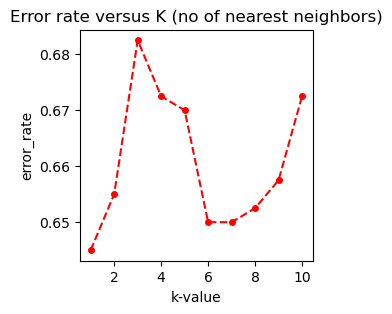

In [61]:
plt.figure(figsize=(3,3))
plt.plot(range(1,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [62]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)
y_predknn_test=knn_model.predict(x_test)
y_predknn_train=knn_model.predict(x_train)

In [63]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_predknn_train))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_predknn_test))

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.355


In [64]:
print(classification_report(y_test,y_predknn_test))

              precision    recall  f1-score   support

           0       0.42      0.37      0.40       105
           1       0.30      0.37      0.33        91
           2       0.27      0.32      0.29        92
           3       0.46      0.36      0.40       112

    accuracy                           0.36       400
   macro avg       0.36      0.35      0.36       400
weighted avg       0.37      0.35      0.36       400



# SVM

In [65]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear') ## base model with default parameters
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [66]:
y_predsvm_test=svclassifier.predict(x_test)
y_predsvm_train=svclassifier.predict(x_train)

In [67]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_predsvm_train))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_predsvm_test))

Train set Accuracy: 
0.95375
_____________________________________

Test set Accuracy:
0.9525


In [68]:
print(classification_report(y_test,y_predsvm_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.93      0.97      0.95        91
           2       0.91      0.91      0.91        92
           3       0.97      0.95      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



# HYPERPARAMETER TUNING

In [69]:
param_grid={'C':[0.1,5,10,50,60],'gamma':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(1,10))}
model=SVC()
gd_svm=GridSearchCV(model,param_grid,verbose=2,scoring='accuracy',cv=5)
gd_svm.fit(x_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.2s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=3; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001,

[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.4s
[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.2s
[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.3s
[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.3s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.4s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.4s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.3s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.3s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.3s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.3s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.3s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.4s
[CV] END ..................C

[CV] END .....................C=0.1, gamma=1, random_state=5; total time=   0.5s
[CV] END .....................C=0.1, gamma=1, random_state=5; total time=   0.5s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.5s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.5s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.4s
[CV] END ...................

[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.4s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.4s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.4s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.4s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.4s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.4s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.4s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.4s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.4s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.4s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.3s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.3s
[CV] END ...................

[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.4s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.4s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.5s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.4s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.5s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.5s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.5s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.5s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.6s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.5s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.5s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.5s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.4s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.4s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.4s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.4s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.4s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.4s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.4s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.5s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.4s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.4s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.4s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.4s
[CV] END ..................C

[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.5s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.5s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.5s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.5s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.5s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.5s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.5s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.5s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.5s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.5s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.5s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.5s
[CV] END ...................

[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.5s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.4s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.4s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.4s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.4s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.7s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.5s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.3s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.3s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.3s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.3s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.3s
[CV] END ..................C

[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.6s
[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.7s
[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.7s
[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.8s
[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.9s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.8s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.6s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.6s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.6s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.6s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.6s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.6s
[CV] END ...................

[CV] END .................C=60, gamma=0.0001, random_state=4; total time=   0.4s
[CV] END .................C=60, gamma=0.0001, random_state=4; total time=   0.4s
[CV] END .................C=60, gamma=0.0001, random_state=4; total time=   0.4s
[CV] END .................C=60, gamma=0.0001, random_state=5; total time=   0.4s
[CV] END .................C=60, gamma=0.0001, random_state=5; total time=   0.4s
[CV] END .................C=60, gamma=0.0001, random_state=5; total time=   0.5s
[CV] END .................C=60, gamma=0.0001, random_state=5; total time=   0.4s
[CV] END .................C=60, gamma=0.0001, random_state=5; total time=   0.4s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.4s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.5s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.5s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.5s
[CV] END .................C=

[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.3s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.3s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.3s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.3s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.3s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.3s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.4s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.4s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.3s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.4s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.4s
[CV] END ...................C=60, gamma=0.01, random_state=9; total time=   0.5s
[CV] END ...................

[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.5s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.5s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.5s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.5s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy', verbose=2)

In [70]:
print(gd_svm.best_params_)

{'C': 60, 'gamma': 0.001, 'random_state': 1}


In [71]:
svclassifier=SVC(C=60,gamma=0.001,random_state=1,probability=True)
svclassifier.fit(x_train,y_train)

SVC(C=60, gamma=0.001, probability=True, random_state=1)

In [72]:
y_predsvm_test=svclassifier.predict(x_test)
y_predsvm_train=svclassifier.predict(x_train)

In [73]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_predsvm_train))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_predsvm_test))

Train set Accuracy: 
0.92125
_____________________________________

Test set Accuracy:
0.925


# DECISION TREE

In [74]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier() 
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [75]:
y_train_predict=model.predict(x_train)#predicting training data to check training performance 
# Training accuracy
accuracy_score(y_train,y_train_predict)

1.0

In [76]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.8325

In [77]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        97
           1       0.81      0.76      0.79        97
           2       0.74      0.75      0.74        91
           3       0.89      0.87      0.88       115

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



# HYPERPARAMETER TUNNING

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt',None]}


# Fit the Algorithm

dtc=GridSearchCV(model,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc.fit(x_train,y_train)   # model fitting.

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.419 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.506 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.625 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.622 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.506 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.250 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.316 total time=   0.0s
[CV 3/5] END criterion=gini, 

[CV 5/5] END criterion=gini, max_depth=2, max_features=None, min_samples_split=10, splitter=best;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=None, min_samples_split=10, splitter=random;, score=0.637 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=None, min_samples_split=10, splitter=random;, score=0.531 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=None, min_samples_split=10, splitter=random;, score=0.559 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=None, min_samples_split=10, splitter=random;, score=0.619 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=None, min_samples_split=10, splitter=random;, score=0.544 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=3, splitter=best;, score=0.512 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=3,

[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, splitter=best;, score=0.784 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, splitter=best;, score=0.800 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, splitter=best;, score=0.766 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, splitter=best;, score=0.734 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, splitter=random;, score=0.728 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, splitter=random;, score=0.659 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_split=10, spl

[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=5, splitter=best;, score=0.800 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=5, splitter=random;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=5, splitter=random;, score=0.709 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=5, splitter=random;, score=0.706 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=5, splitter=random;, score=0.691 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=5, splitter=random;, score=0.650 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=10, splitter=best;, score=0.797 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_split=10, spl

[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_split=5, splitter=best;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_split=5, splitter=best;, score=0.834 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_split=5, splitter=best;, score=0.819 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_split=5, splitter=best;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_split=5, splitter=best;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_split=5, splitter=random;, score=0.775 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_split=5, splitter=random;, score=0.713 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_split=5, splitter=ra

[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_split=3, splitter=best;, score=0.853 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_split=3, splitter=random;, score=0.834 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_split=3, splitter=random;, score=0.794 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_split=3, splitter=random;, score=0.800 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_split=3, splitter=random;, score=0.803 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_split=3, splitter=random;, score=0.794 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_split=5, splitter=best;, score=0.831 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_split=5, split

[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.631 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.559 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.747 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.691 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.675 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.606 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.519 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, spl

[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=random;, score=0.559 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.562 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.569 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.606 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.575 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.534 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, sp

[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.534 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.684 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.744 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.675 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.647 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.662 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.553 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, spl

[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=5, splitter=random;, score=0.641 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=10, splitter=best;, score=0.572 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=10, splitter=best;, score=0.722 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=10, splitter=best;, score=0.734 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=10, splitter=best;, score=0.797 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=10, splitter=best;, score=0.719 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=10, splitter=random;, score=0.472 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=

[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, splitter=best;, score=0.713 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, splitter=best;, score=0.681 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, splitter=best;, score=0.591 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, splitter=best;, score=0.619 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, splitter=best;, score=0.759 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.622 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.634 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, spl

[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_split=3, splitter=random;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_split=3, splitter=random;, score=0.856 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_split=5, splitter=best;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_split=5, splitter=best;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_split=5, splitter=best;, score=0.844 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_split=5, splitter=best;, score=0.800 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_split=5, splitter=best;, score=0.869 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_split=5, spl

[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.731 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.703 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.597 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.584 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.678 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.456 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.556 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=

[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.675 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.597 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.484 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.541 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.631 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.519 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.644 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, s

[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.662 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.250 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.269 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.378 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.275 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.253 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.250 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samp

[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.428 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.438 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.378 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.550 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.353 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.450 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.503 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samp

[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.534 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.662 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, splitter=random;, score=0.347 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.512 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.400 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.456 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.422 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min

[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.603 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.406 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.359 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.591 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.581 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.269 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto,

[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_split=10, splitter=random;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.534 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.694 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.397 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.547 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3, splitter=random;, score=0.353 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_sam

[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=5, splitter=random;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=5, splitter=random;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=5, splitter=random;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=5, splitter=random;, score=0.794 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=5, splitter=random;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=10, splitter=best;, score=0.828 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=10, splitter=best;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, 

[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_split=3, splitter=random;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_split=3, splitter=random;, score=0.800 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_split=3, splitter=random;, score=0.831 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_split=5, splitter=best;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_split=5, splitter=best;, score=0.863 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_split=5, splitter=best;, score=0.859 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_split=5, splitter=best;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_sa

[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.694 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.456 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.675 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.619 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.700 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.572 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_split=3, splitter=best;, score=0.847 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_fea

[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.600 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.659 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.631 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.481 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.613 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.522 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=10, splitter=random;, score=0.481 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_fe

[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.784 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.637 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.725 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.694 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.609 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.719 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.547 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt

[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.569 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.466 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.525 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.584 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.512 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=5, splitter=best;, score=0.759 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=5, splitter=best;, score=0.700 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=

[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=3, splitter=random;, score=0.834 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=3, splitter=random;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=3, splitter=random;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=3, splitter=random;, score=0.847 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=5, splitter=best;, score=0.859 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=5, splitter=best;, score=0.872 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_split=5, splitter=best;, score=0.850 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=No

[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.613 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.481 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.741 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.691 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.647 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=

[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.738 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.650 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.659 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.700 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.731 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.597 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.522 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [80]:
# getting best parameters for model.
print(dtc.best_params_)

# getting best estimators
print(dtc.best_estimator_)

{'criterion': 'entropy', 'max_depth': 13, 'max_features': None, 'min_samples_split': 3, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_split=3)


In [81]:
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=0)
dtc_optimal.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=0)

In [82]:
# Predict on the model
y_train_pred=dtc_optimal.predict(x_train)
y_pred=dtc_optimal.predict(x_test)

In [83]:
# Accuracy
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))
print('_____________________________________\n')

print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
0.998125
_____________________________________

Test set Accuracy:
0.8525


# RANDOM FOREST

In [84]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [85]:
# Test accuracy
y_pred = rf.predict(x_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.91

In [86]:
#Train accuracy
y_pred_train = rf.predict(x_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.87      0.91      0.89        91
           2       0.87      0.85      0.86        92
           3       0.94      0.92      0.93       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



# HYPERPARAMETER TUNNING

In [88]:
#Hyperparameter tuning for random forest
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100],
          'max_depth':[10,20,30],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(x, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [89]:
clsr.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_split': 2,
 'n_estimators': 100}

In [90]:
clsr.best_estimator_

RandomForestClassifier(max_depth=30, max_features='auto', max_leaf_nodes=40)

In [91]:
##best Accuracy score after hyper tunning
clsr.best_score_

0.8774981878430154

In [92]:
clsr = RandomForestClassifier(bootstrap=True,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=40,min_samples_leaf=2, min_samples_split=2,
                       n_estimators=100,
                       n_jobs=1,random_state=42,
                       verbose=2)
clsr.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(max_depth=10, max_features='auto', max_leaf_nodes=40,
                       min_samples_leaf=2, n_jobs=1, random_state=42,
                       verbose=2)

In [93]:

#test accuracy
y_pred = clsr.predict(x_test)
y_pred_train=clsr.predict(x_train)
accuracy_score(y_test, y_pred)
     

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.905

In [94]:
# Train accuracy
accuracy_score(y_train, y_pred_train)

0.9575

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.90      0.85      0.87        91
           2       0.84      0.87      0.86        92
           3       0.94      0.93      0.93       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.90       400



# XGB CLASSIFIER

In [96]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

# Fit the Algorithm
xgb.fit(x_train,y_train)

# Predict on the model
y_train_pred=xgb.predict(x_train)
y_pred=xgb.predict(x_test)

In [97]:
# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.92


In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.88      0.92      0.90        91
           2       0.89      0.88      0.89        92
           3       0.95      0.93      0.94       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [99]:
grid_values={
          'learning_rate':[0.6,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]
          }
     

In [100]:
# creating an object of the classifier
xgb = XGBClassifier()

# applying girdsearchcv 
xgb_tune = GridSearchCV(xgb, grid_values, cv=3,verbose=4)
xgb_tune.fit(x_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.899 total time=   0.8s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.906 total time=   0.8s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.908 total time=   0.8s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.906 total time=   1.2s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.902 total time=   0.9s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.906 total time=   0.9s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.904 total time=   1.7s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.912 total time=   1.7s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=4)

In [101]:
xgb_tune.best_params_

{'gamma': 0.2, 'learning_rate': 0.6, 'n_estimators': 1000, 'subsample': 0.5}

In [102]:
xgb_opti=XGBClassifier(learning_rate=0.6,gamma=0.2,n_estimators=1000,subsample=0.5)
xgb_opti.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [103]:
y_train_pred=xgb_opti.predict(x_train)
y_pred=xgb_opti.predict(x_test)

In [104]:
# Accuracy

print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))
     

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.9275


In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.91      0.95      0.92        91
           2       0.89      0.88      0.89        92
           3       0.94      0.93      0.93       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



# GRADIENT BOOSTING CLASSEIFIER

In [106]:
# ML Model - 3 Implementation
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=0)

# Fit the Algorithm
gbc.fit(x_train,y_train)

# Predict on the model
y_train_pred=gbc.predict(x_train)
y_pred=gbc.predict(x_test)

In [107]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
0.9975
_____________________________________

Test set Accuracy:
0.8975


In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.87      0.90      0.89        91
           2       0.81      0.85      0.83        92
           3       0.93      0.88      0.91       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [109]:
gbc=GradientBoostingClassifier(random_state=0)

grid_values={'learning_rate':[0.005,1,2,3],
             'min_samples_split':range(10,26)
          
             }
# Fit the Algorithm
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(x_train,y_train)


Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             scoring='accuracy', verbose=1)

In [110]:
gbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 11}

In [111]:
gbc_tune.best_estimator_

GradientBoostingClassifier(learning_rate=1, min_samples_split=11,
                           random_state=0)

In [117]:
gbc_optimal=GradientBoostingClassifier(learning_rate=1,random_state=0,min_samples_split=11)
gbc_optimal.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_split=11,
                           random_state=0)

In [118]:
y_train_pred=gbc_optimal.predict(x_train)  
y_pred=gbc_optimal.predict(x_test)
     

In [119]:
print('Train set Accuracy: ' )
print(accuracy_score(y_train,y_train_pred))


print('_____________________________________\n')


print('Test set Accuracy:')
print(accuracy_score(y_test,y_pred))

Train set Accuracy: 
1.0
_____________________________________

Test set Accuracy:
0.9025


# MODEL COMPARISON REPORT

In [193]:
models = ['Logistic Regression','KNN','SVM','Decision Tree','Random Forest','Gradient Boosting regressor','XGBoost']
accuracy = [0.966,0.355,0.925,0.8525,0.905,0.9275,0.9025]

In [194]:
model_results = pd.DataFrame(columns=['Model', 'Accuracy'])

In [195]:
model_results['Model'] = models
model_results['Accuracy'] = accuracy

In [196]:
model_results.head()

,Model,Accuracy
0,Logistic Regression,0.9660
1,KNN,0.3550
2,SVM,0.9250
3,Decision Tree,0.8525
4,Random Forest,0.9050


<Axes: xlabel='Model', ylabel='Accuracy'>

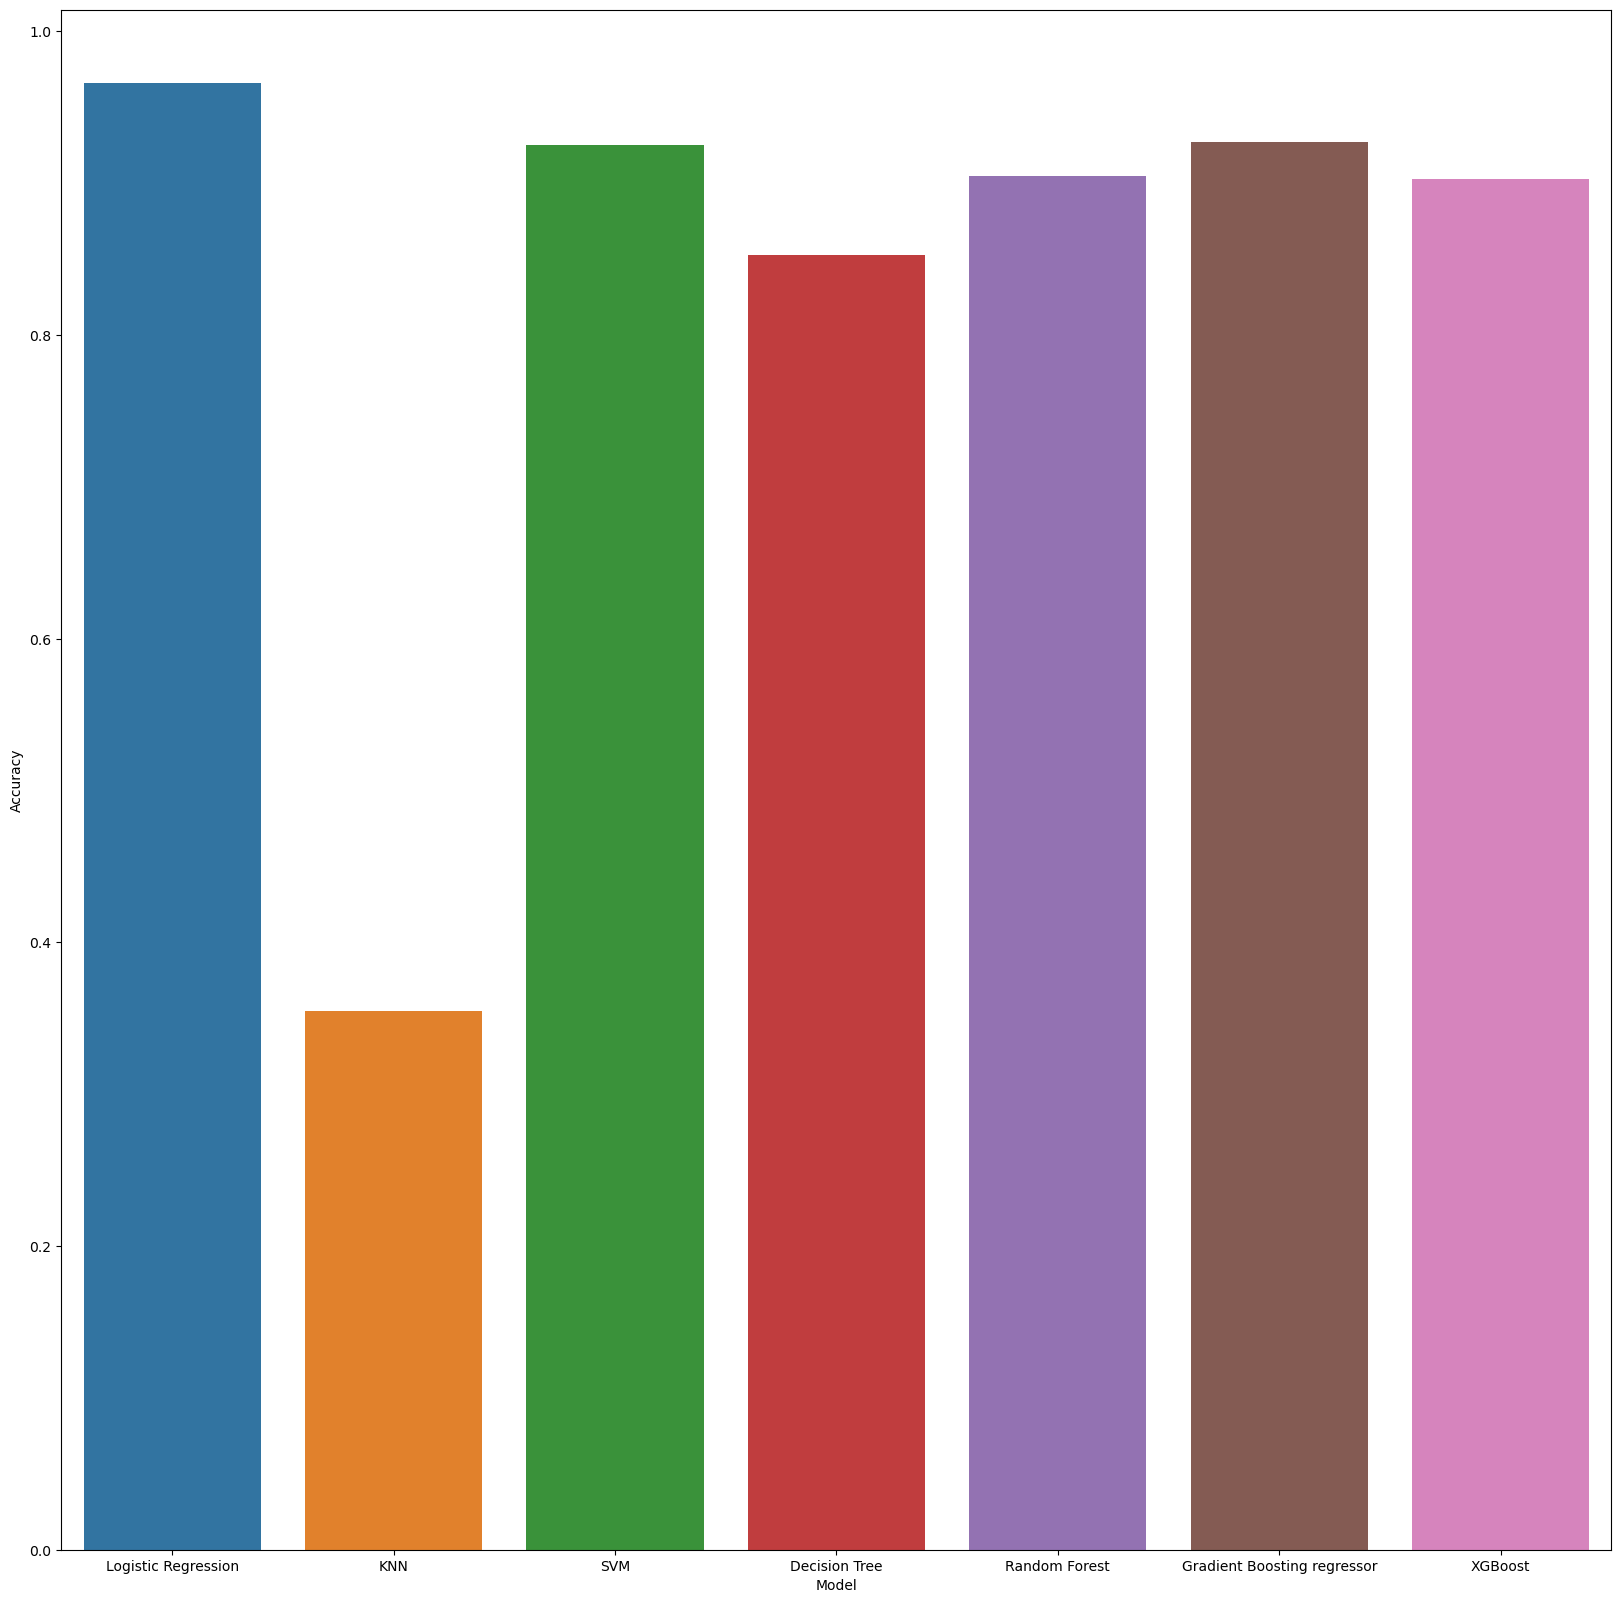

In [197]:
plt.figure(figsize=(20,20))
sns.barplot(x=model_results['Model'],y=model_results['Accuracy'])


Logistic regression gives the best result

# FEATURE IMPORTANCE 

In [198]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':x.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

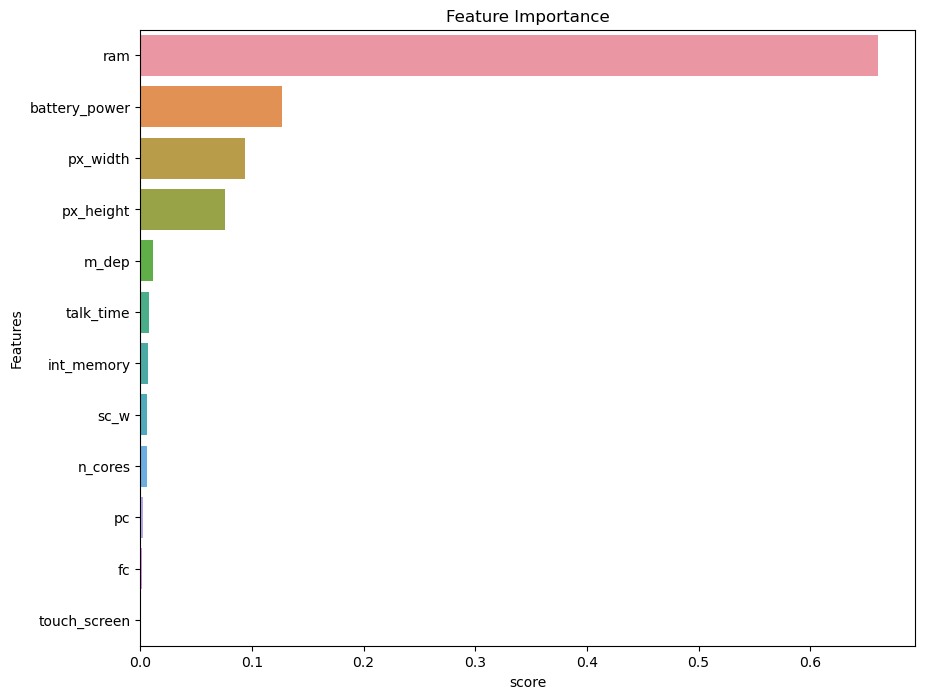

In [201]:
plot_feature_importance(dtc_optimal)

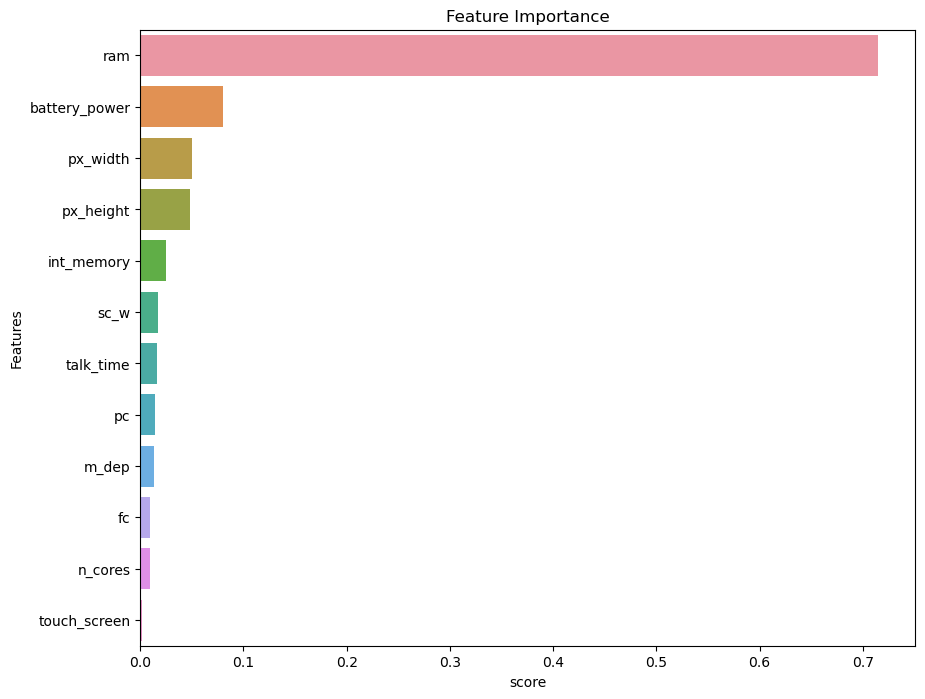

In [200]:
plot_feature_importance(clsr)

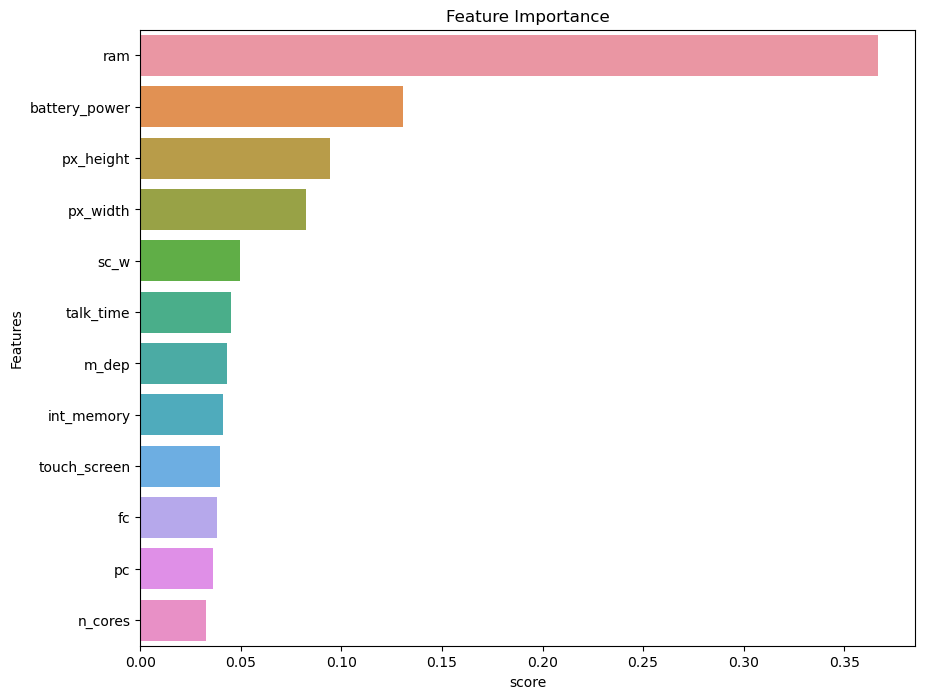

In [199]:
plot_feature_importance(xgb_opti)

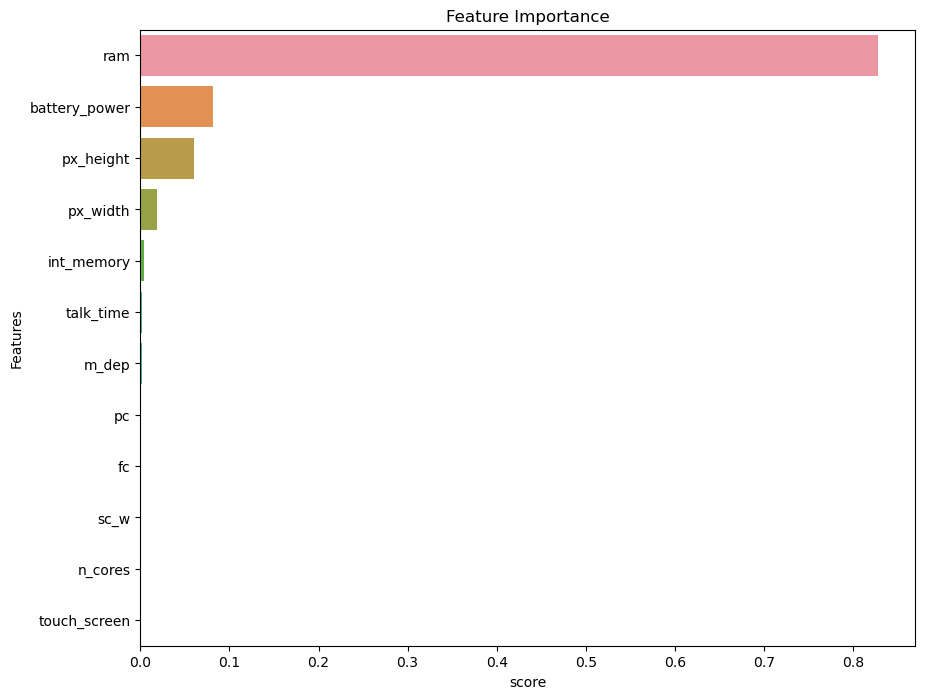

In [129]:
plot_feature_importance(gbc_optimal)

In terms of feature importance 'RAM', 'battery_Power', 'px_height' and 'px_width' are the imporatant features.